<a href="https://colab.research.google.com/github/dikshgithub/CUSTOMER_SEGMENTATION/blob/main/Capstone_Project_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Introduction </b>

### In a world where businesses are growing tremendously, and cater to a large number of customers on a regular basis. It becomes very essential for businesses to categorize their customers, this would not only lead to better customer service but also would help businesses understand how different customers can impact their business. This project, aims to classify customers into different categories and understand thier impact on the business.

NAME : DIKSHA BATRA

PROJECT TYPE : INDIVIDUAL

GITHUB LINK:

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

### This project has been completed in 5 steps :-

### 1. Data Cleaning
### 2. Exploratory Data Analysis (EDA)
### 3. Data Transformation
### 4. Clustering
### 5. Cluster Profiling

### Importing the data

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the data
data = pd.read_excel('/content/drive/MyDrive/Amol Prabhu - Capstone Project - Customer Segmentation/Online Retail.xlsx')

In [ ]:
# First 5 rows of the data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Statistical description of the data
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


##1. **Data Cleaning**

### In this step, the main focus will be to handle the null values and other errors in the data. Columns that are not required will also be dropped.

In [ ]:
# Total null values in each of the columns
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Null values of the Description column

In [ ]:
# Number of unique products in the dataset
data['Description'].nunique()

4223

### There are 1454 null values in the description column. There are 4223 different products in the dataset. It is not possible to fill the null values in a strategical manner. Hence, we will drop the null values of the description column.

In [ ]:
# Dropping the null values of the description column
data.dropna(subset = ['Description'], inplace = True)

## Null values of the Customer ID column

### As customer ID is a 5 digit number, we can convert it from a float type to an integer type.

In [ ]:
# Sum of null values in the dataset
data.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [ ]:
# Number of unique Customer IDs
data['CustomerID'].nunique()

4372

### There are 4372 unique customers in the dataset, there are also 133626 null values in the column. There is no particular method to fill these huge number of points. We cannot use median, mean or mode to fill these values. It is close to impossible that one customer ID can fill 133626 rows. Hence, we will drop the rows containing null values.

In [ ]:
# Dropping the rows which contain null values in the Customer ID column
data.dropna(subset=['CustomerID'], axis = 0, inplace = True)

In [ ]:
# Re-checking null values after removal
print(data.isna().sum())
print(f'The shape of the data is {data.shape}')

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
The shape of the data is (406829, 8)


In [ ]:
# Converting Customer ID column from float type to int type
data['CustomerID'] = data['CustomerID'].apply(int)

### The null values have been succesfully removed, unfortunately more than 100000 rows have been lost in the process.

### It is known that some of the orders have been cancelled, the invoice numbers of these orders start with a 'C'. The cancelled orders are also removed.

In [ ]:
# Converting the column to a string type to detect 'C'
data['InvoiceNo'] = data['InvoiceNo'].apply(str)

In [ ]:
# Creating a function to detect cancelled orders
def cancelled_order(rows):
  '''Detects cancelled orders and returns YES or NO accordingly'''
  if 'C' in rows:
    return 'YES'
  else:
    return 'NO'

In [ ]:
# Applying the above function and creating a new column to display cancelled orders
data['Cancelled'] = data['InvoiceNo'].apply(cancelled_order)

In [ ]:
# Dropping the cancelled orders
data.drop(data[data['Cancelled'] == 'YES'].index, inplace=True)

In [ ]:
# Dropping the cancelled column
data.drop('Cancelled', axis = 1, inplace = True)

In [ ]:
# Converting the Invoice no column back to a numerical type
data['InvoiceNo'] = data['InvoiceNo'].apply(int)

### Stock code and Item description represent the same thing, but item description describes it more clearly. Hence, we can drop the stock code.

In [ ]:
# Dropping Stock Code column
data.drop('StockCode', axis = 1, inplace = True)

### Using the invoice date column, elements such as day month and year are extracted. This will help in the EDA process.

In [ ]:
# Using the Invoice date column to extract
data['Day'] = data['InvoiceDate'].dt.day
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year

### The time part of the column is not used because, time of the day does not influence the orders to a large extent.

### After extraction of the day, month and year. The invoice date column will be dropped.

In [ ]:
# Dropping the invoice date column
data.drop('InvoiceDate', axis = 1, inplace = True)

In [ ]:
# Brief Description of the data
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Day,Month,Year
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,13.021823,3.116174,15294.315171,15.042181,7.612537,2010.934259
std,13106.167695,180.420210,22.096788,1713.169877,8.653771,3.416527,0.247829
min,536365.000000,1.000000,0.000000,12346.000000,1.000000,1.000000,2010.000000
25%,549234.000000,2.000000,1.250000,13969.000000,7.000000,5.000000,2011.000000
50%,561893.000000,6.000000,1.950000,15159.000000,15.000000,8.000000,2011.000000
75%,572090.000000,12.000000,3.750000,16795.000000,22.000000,11.000000,2011.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,31.000000,12.000000,2011.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


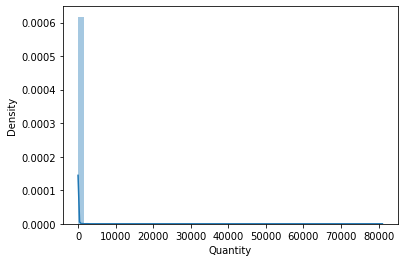

In [ ]:
# Distribution of the Quantity column
sns.distplot(data['Quantity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


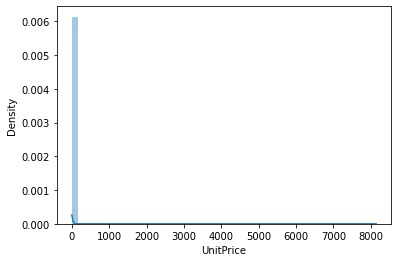

In [ ]:
# Distribution of the Unit Price column
sns.distplot(data['UnitPrice'])

### From the description and distribution plots above, it is seen that outliers do exist.

In [ ]:
# Creating a function to remove outliers
def remove_outliers(df , column):
  '''Removes outliers in given the dataframe and column'''
  q3 = df[column].quantile(0.75)
  q1 = df[column].quantile(0.25)
  iqr = q3 - q1
  upper_limit = q3 + (1.5 * iqr)
  lower_limit = q1 - (1.5 * iqr)

  if lower_limit < 0:
    df = df[df[column] <= upper_limit]
  else:
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

  return df

In [ ]:
# Removing the outliers using the function created
data = remove_outliers(df = data, column = 'Quantity')
data = remove_outliers(df = data, column = 'UnitPrice')

### In the data cleaning procedure :-

*   Null Values were removed
*   Cancelled orders were removed
*   Invoice Date column was split to form seperate date, month and year columns
*   Outliers were removed
*   Columns such as invoice date, stock code have been removed



## 2. **Exploratory Data Analysis (EDA)**

### In this section, different columns will be explored individually and also as a combination of different columns.

### Univariate Analysis

### Distribution of Quantity

Text(0.5, 1.0, 'Quantity sold')

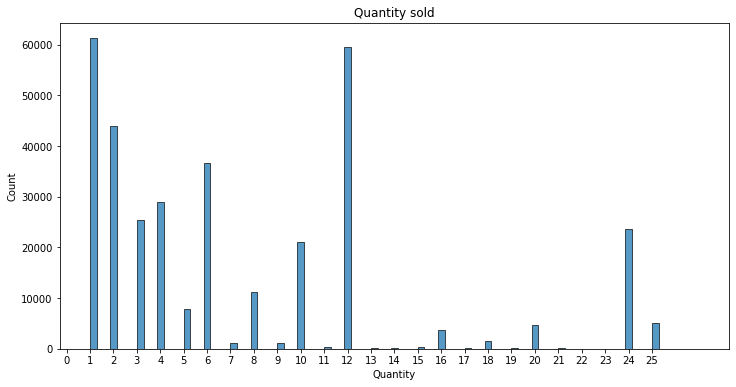

In [ ]:
# Distribution of the quantity column
plt.figure(figsize = (12,6))
sns.histplot(data['Quantity'])
plt.xticks(np.arange(0,26))
plt.title('Quantity sold')

### From the histogram plotted for quantity, it is seen that, 12 units and single units are highly sold. Units of less than 12 are sold more than units exceeding 12.



### Top 10 most repeatedly sold items

In [ ]:
# Top 10 most repeatedly sold items
data['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    1680
JUMBO BAG RED RETROSPOT               1329
PARTY BUNTING                         1275
LUNCH BAG RED RETROSPOT               1207
ASSORTED COLOUR BIRD ORNAMENT         1159
SET OF 3 CAKE TINS PANTRY DESIGN      1120
LUNCH BAG  BLACK SKULL.               1048
SPOTTY BUNTING                         976
LUNCH BAG SPACEBOY DESIGN              971
PACK OF 72 RETROSPOT CAKE CASES        963
Name: Description, dtype: int64

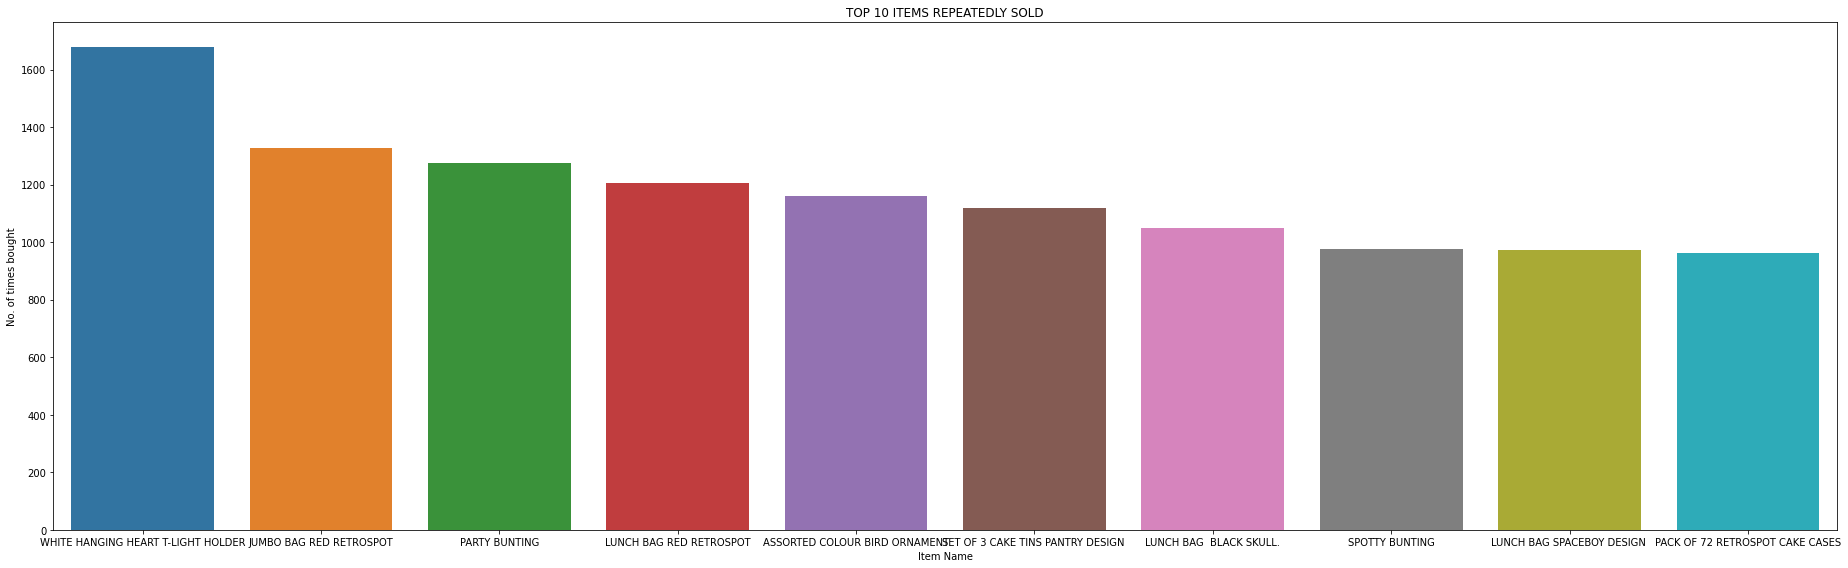

In [ ]:
# Barplot of the top 10 most repeatedly sold items
plt.figure(figsize = (26,8))
sns.barplot(x = data['Description'].value_counts()[:10].index, y = data['Description'].value_counts()[:10].values)
plt.xlabel('Item Name')
plt.ylabel('No. of times bought')
plt.title('TOP 10 ITEMS REPEATEDLY SOLD')
plt.tight_layout()

### Distribution of the Unit Price

Text(0.5, 1.0, 'UNIT PRICE DISTRIBUTION')

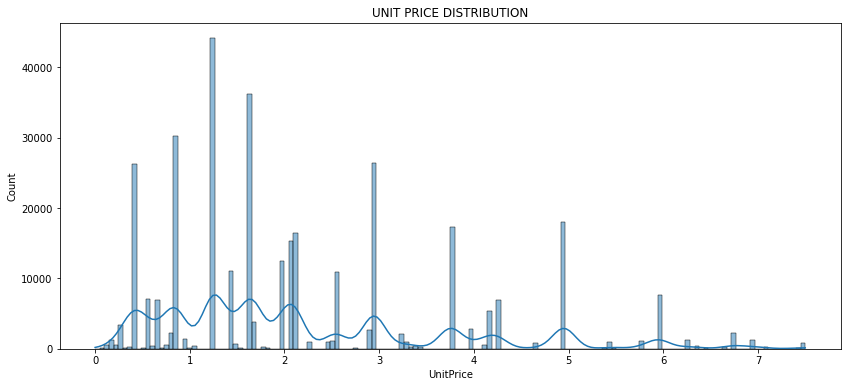

In [ ]:
# Distribution of unit price
plt.figure(figsize = (14,6))
sns.histplot(data['UnitPrice'], kde=True)
plt.title('UNIT PRICE DISTRIBUTION')

### From the distribution of unit price, it is understood that most items have a lower price range. There are comparatively fewer products with higher unit prices than products with lower unit prices.

### Customer who purchased most number of times

Text(0.5, 1.0, 'TOP 10 REPEATED CUSTOMER ID')

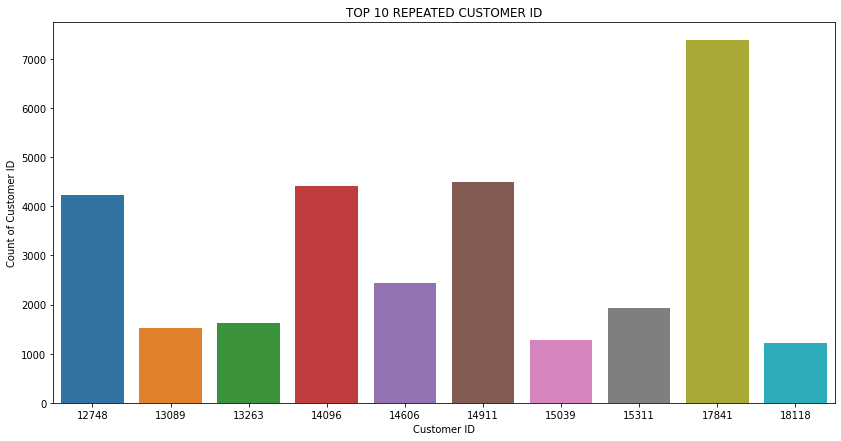

In [ ]:
# Top 10 repeated customer ID
plt.figure(figsize = (14,7))
sns.barplot(x = data['CustomerID'].value_counts()[:10].index , y = data['CustomerID'].value_counts()[:10].values)
plt.xlabel('Customer ID')
plt.ylabel('Count of Customer ID')
plt.title('TOP 10 REPEATED CUSTOMER ID')

### As seen from the barplot of the customer ID column, customer with the ID 17841 has highest number of counts, which indicates that they purchased many different items.

### Countries that were sold different items the most

Text(0.5, 1.0, 'TOP 10 COUNTRIES SOLD TO')

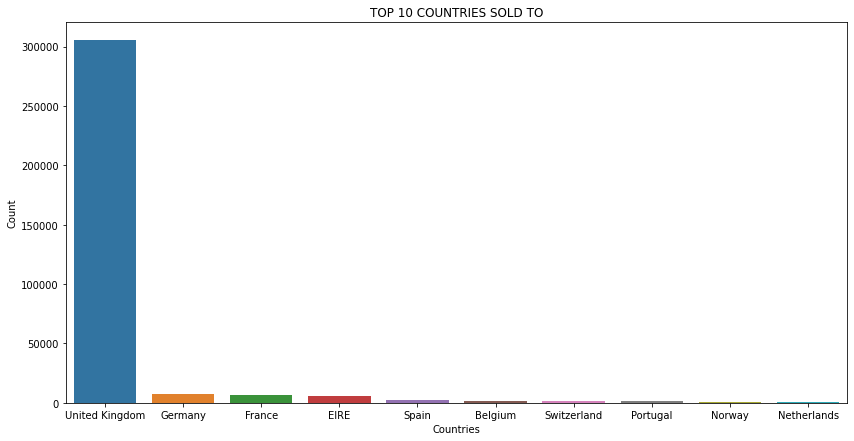

In [ ]:
# Top 10 countries that were sold different items
plt.figure(figsize = (14,7))
sns.barplot(x = data['Country'].value_counts()[:10].index, y = data['Country'].value_counts()[:10].values)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('TOP 10 COUNTRIES SOLD TO')

### From the barplot for purchases by countries, it is clearly seen that United Kingdom dominates the purchases compared to other countries. All the top 10 countries are a part of Europe, itself.

### Monthly purchaces

Text(0.5, 1.0, 'MONTHLY PURCHASES')

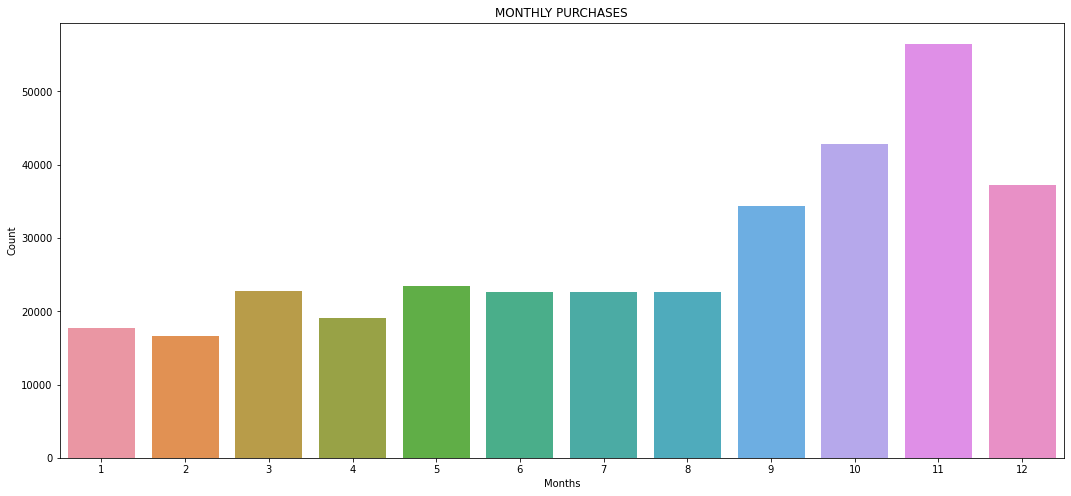

In [ ]:
# Monthly purchases
plt.figure(figsize = (18,8))
sns.barplot(x = data['Month'].value_counts().index, y = data['Month'].value_counts().values)
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('MONTHLY PURCHASES')

### From the plot for monthly purchases it is seen that most of the purchases, occur in the month of November, followed by October and December.

### Bivariate Analysis

### Invoices with highest number of items

In [ ]:
# Invoices with most number of items
inv_quantity_10 = data.groupby('InvoiceNo').sum()['Quantity'].sort_values(ascending = False)[:10]

Text(0.5, 1.0, 'INVOICE NUMBER AND SUM OF QUANTITIES')

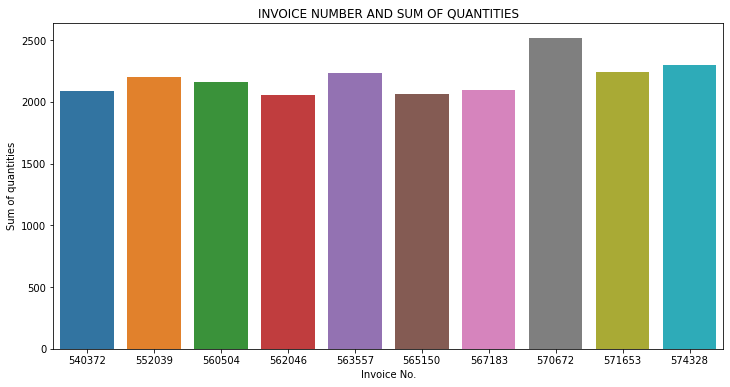

In [ ]:
# Barplot for invoices with most number of items
plt.figure(figsize = (12,6))
sns.barplot(x = inv_quantity_10.index, y = inv_quantity_10.values)
plt.xlabel('Invoice No.')
plt.ylabel('Sum of quantities')
plt.title('INVOICE NUMBER AND SUM OF QUANTITIES')

### Invoice No. 570672 has the most number of items in it.

### Customer ID in terms of quantities purchased

In [ ]:
# Top 10 Customer Id in terms of quantities purchased
customer_quantity_10 = data.groupby('CustomerID').sum()['Quantity'].sort_values(ascending = False)[:10]

Text(0.5, 1.0, 'CUSTOMER ID AND SUM OF QUANTITY')

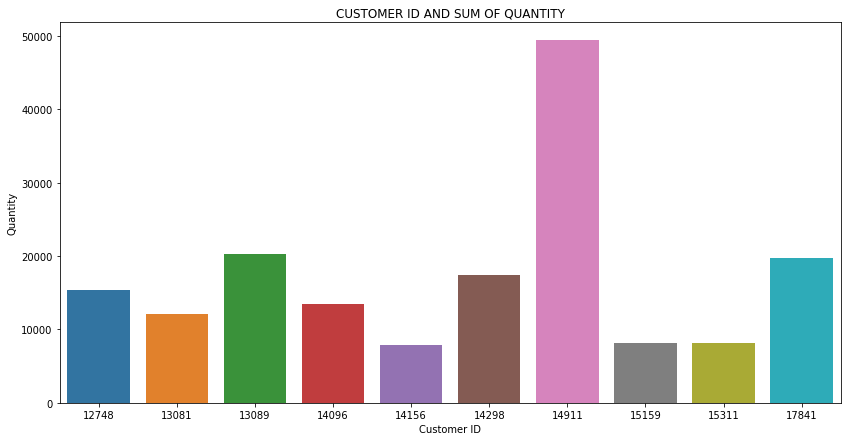

In [ ]:
# Barplot for top 10 customers who purchased in high quantity
plt.figure(figsize = (14,7))
sns.barplot(x = customer_quantity_10.index, y = customer_quantity_10.values)
plt.xlabel('Customer ID')
plt.ylabel('Quantity')
plt.title('CUSTOMER ID AND SUM OF QUANTITY')

### Customer with the ID 14911 purchases in large number significantly more than other customers. This customer could be vital to the business.

### Items sold in terms of quantites

In [ ]:
# Top 10 items sold in terms of quantity
item_quantity_10 = data.groupby('Description').sum()['Quantity'].sort_values(ascending = False)[:10]

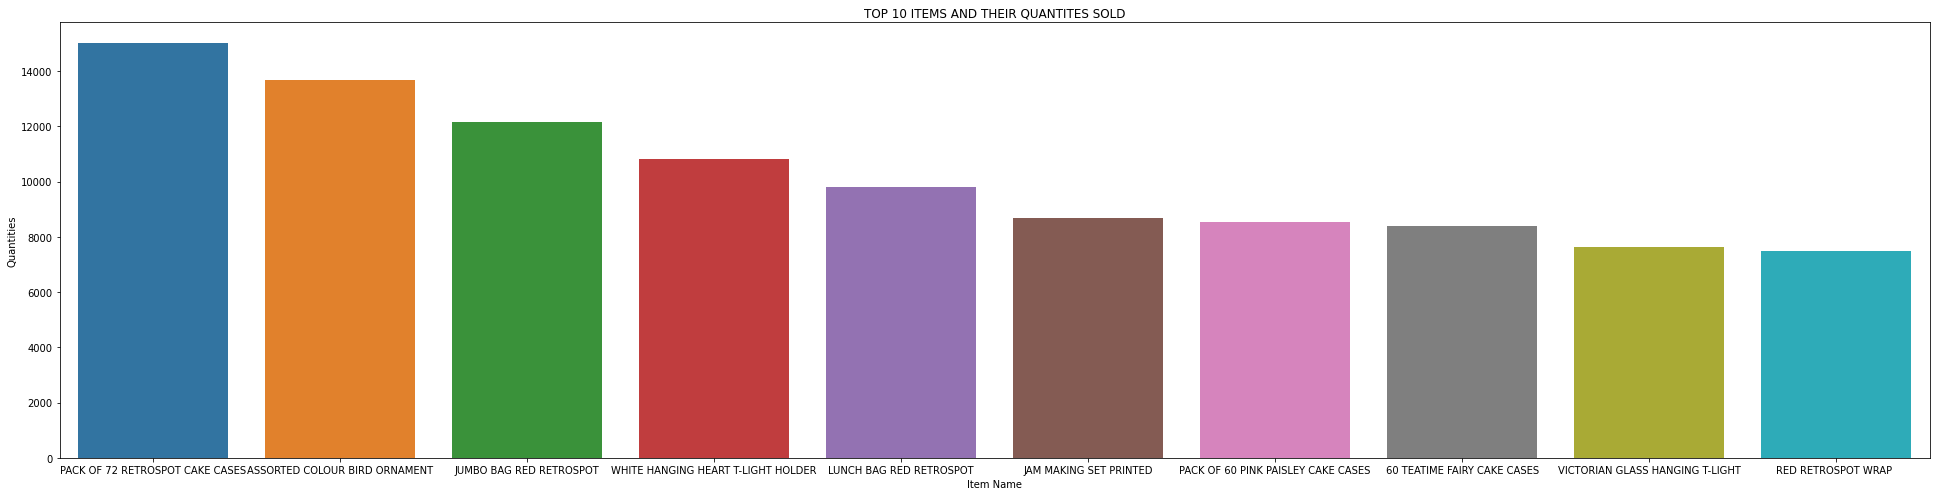

In [ ]:
# Barplot of top 10 items sold in terms of quantity
plt.figure(figsize = (27,7))
sns.barplot(x = item_quantity_10.index, y = item_quantity_10.values)
plt.xlabel('Item Name')
plt.ylabel('Quantities')
plt.title('TOP 10 ITEMS AND THEIR QUANTITES SOLD')
plt.tight_layout()

### 'Pack of 72 retrospot cake cases' were sold the most in terms of quantity, around 15000 units.

### Correlation between variables

Text(0.5, 1.0, 'CORRELTAION MATRIX')

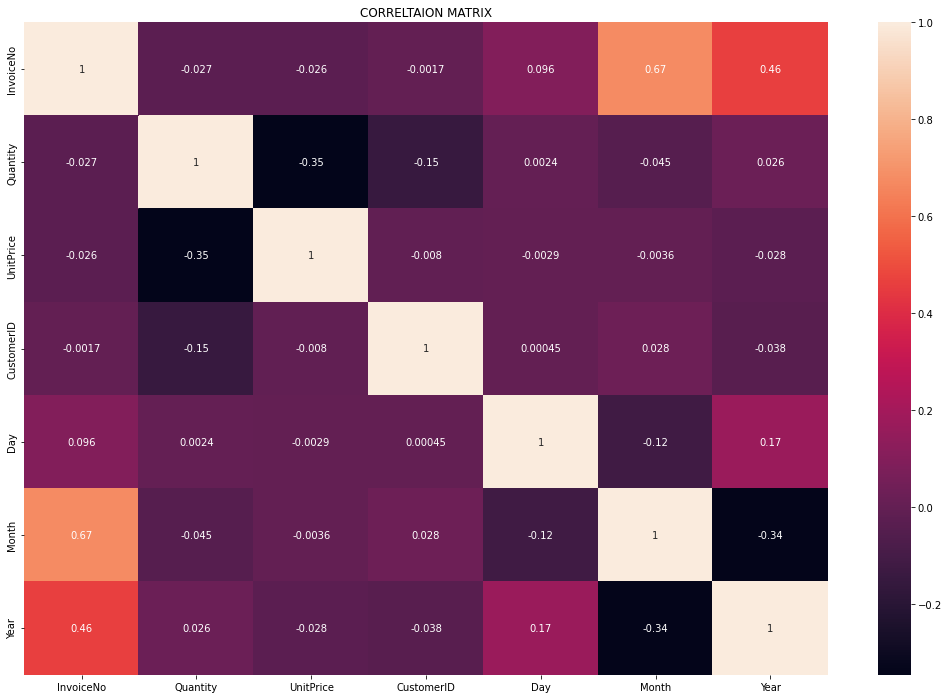

In [ ]:
# Correlation between various columns
plt.figure(figsize = (18,12))
sns.heatmap(data.corr(), annot = True)
plt.title('CORRELTAION MATRIX')

### From the correaltion matrix, it is understood that most columns are not correlated to each other. Except for month and year, they are highly correlated with the invoice number. Whereas month and year are negatively correlated.


### From the EDA section some assumptions can be made

*   Small to medium quantities of each item are purchased more.
*   Unit price for most products is low.
*   Last quarter of the year has more orders maybe due to the holiday season.
*   As customers buy in large quantites, it is a volume based business.



## 3. **Data Transformation**

### For the purpose of this project - Recency, Frequency and Monetory (RFM) analysis shall be conducted. On the basis of these 3 factors, customers can be classified into different groups. They can be catered by the business depending on the cluster they belong to.

### In this section, an RFM dataframe would be conducted which can be further used in a model for clustering.

In [ ]:
# Creating an invoice date column
data['InvoiceDate'] = pd.to_datetime(data[['Day', 'Month', 'Year']])

### Recency

### Here, the most recent order of customers is identified.

In [ ]:
# Most recent date in the dataset
latest_date = max(data['InvoiceDate'])

In [ ]:
# Creating a dataframe to find the most recent purchase
recency_df = pd.DataFrame(data.groupby('CustomerID').max()['InvoiceDate'], columns = ['InvoiceDate'])
recency_df.reset_index(inplace = True)

In [ ]:
# Calculating days from most recent purchase
recency_df['Recency'] = recency_df['InvoiceDate'].apply(lambda x: (latest_date - x).days)
recency_df = recency_df.loc[: , ['CustomerID', 'Recency']]

### Frequency


### Frequency of purchases by the customers will be calculated.

### Frequency would be calculated with the number of unique invoice numbers, which means the number of different times the customer has been billed for the items bought. This would explain the frequency of sales to the customer.

In [ ]:
# Creating a frequency dataframe
freq_df = pd.DataFrame(data = data.groupby('CustomerID').nunique()['InvoiceNo'])
freq_df.reset_index(inplace = True)
freq_df.columns = ['CustomerID', 'Frequency']

### Monetary

### Here, the sum of billed value for each customer will be calculated.

In [ ]:
# Creating a dataframe with total billed amount
monetary_df = data.loc[:,['CustomerID', 'Quantity', 'UnitPrice']]
monetary_df['TotalAmount'] = monetary_df.loc[:,'Quantity'] * monetary_df.loc[:,'UnitPrice']

In [ ]:
# Grouping by customer ID to find total billed amount per customer
monetary_df = pd.DataFrame(monetary_df.groupby('CustomerID').sum()['TotalAmount'])
monetary_df.reset_index(inplace = True)
monetary_df.columns = ['CustomerID', 'Monetary']

### After creating 3 dataframes for recency, frequency and monetary, each grouped on the basis of customer ID, these can be now merged into one dataframe.

In [ ]:
# Merging 3 dataframes to form an RFM dataframe
rec_fre = recency_df.merge(freq_df, on = 'CustomerID' )
rfm_df = rec_fre.merge(monetary_df, on = 'CustomerID')

In [ ]:
# First 5 rows of the RFM dataframe
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12347,2,7,3314.73
1,12348,248,3,90.20
2,12349,18,1,999.15
3,12350,310,1,294.40
4,12352,36,7,1130.94


In [ ]:
# Information of the RFM dataframe
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4192 non-null   int64  
 1   Recency     4192 non-null   int64  
 2   Frequency   4192 non-null   int64  
 3   Monetary    4192 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 163.8 KB


In [ ]:
# Number of unique customer ID in the original dataframe
data['CustomerID'].nunique()

4192

### As seen the number of unique customer IDs in the original datframe match the RFM dataframe. Hence, we have accounted for all the customers.

In [ ]:
# Making the customer ID the index of the dataframe
rfm_df.set_index('CustomerID', inplace= True)

In [ ]:
# Statistical Description of the RFM dataset
rfm_df.describe()

,Recency,Frequency,Monetary
count,4192.000000,4192.000000,4192.000000
mean,91.977576,4.015983,1030.263007
std,99.896494,7.022919,2205.355349
min,0.000000,1.000000,0.000000
25%,17.000000,1.000000,207.850000
50%,50.000000,2.000000,468.665000
75%,143.000000,4.000000,1136.625000
max,373.000000,197.000000,85018.780000


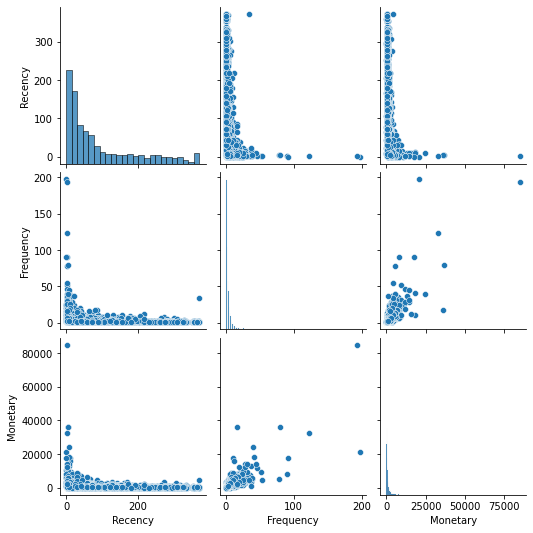

In [ ]:
# Graphical representation of the relation between recency, frequency and monetary
sns.pairplot(rfm_df)

### The above pairplot explains the relation between recency, frequency and monetory variables. Each data point represents a customer. It can be seen that :-

*   There are many recent purchaces with higher monetary value than older purchases.
*   Frequency of orders have been higher recently.
*   Frequency and monetary variables have slight linear trend.



### There are some customers who are potential outliers, but these cannot be removed because, for example there is a customer how very recently has had a very high billing value. He could be vital to the business. There is also another customer who has frequently billed a high value. Hence, if these are removed, business could miss classifying their main customers, who could potentially be of high value in the future also.

### The values in the columns have different ranges which can impact analysis, hence, we will scale all the values to one common range

In [ ]:
# Importing the scaler
from sklearn.preprocessing import StandardScaler, Normalizer

In [ ]:
# Creating a copy of the rfm dataframe
rfm_df_copy = rfm_df.copy()

In [ ]:
# Scaling the dataframe
scaler = StandardScaler()
normal = Normalizer()
scaled_data = scaler.fit_transform(rfm_df_copy)
scaled_data = normal.fit_transform(scaled_data)
rfm_scaled = pd.DataFrame(scaled_data, columns = ['Recency','Frequency','Monetary'])
rfm_scaled.set_index(rfm_df_copy.index, inplace=True)

In [ ]:
# First 5 rows of the scaled data
rfm_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347,-0.626816,0.295692,0.720879
12348,0.960887,-0.089003,-0.262249
12349,-0.864947,-0.501592,-0.016478
12350,0.970328,-0.190932,-0.148350
12352,-0.795155,0.602936,0.064780


## 4. **Clustering**

In [ ]:
# Importing libraries necessary for clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [ ]:
# Creating an instance of the model
kmeans = KMeans()

### KMeans requires the number of clusters to be specified during the model building process. To know the right number of clusters, methods such as elbow method and silhouette analysis can be used. These methods will help in selection of the optimum number of clusters.

### Elbow Method

In [ ]:
# Using the elbow method to find out optimum number of clusters, with different metrics
def elbow_method(X):
  ''' Displays elbow curves with different metrics '''

  metrics = ['distortion', 'calinski_harabasz', 'silhouette']

  for m in metrics:
    visualizer = KElbowVisualizer(kmeans, k = (2,10), metric = m)
    visualizer.fit(X)
    visualizer.poof()

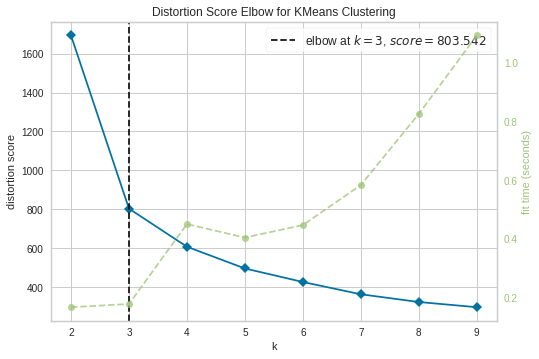

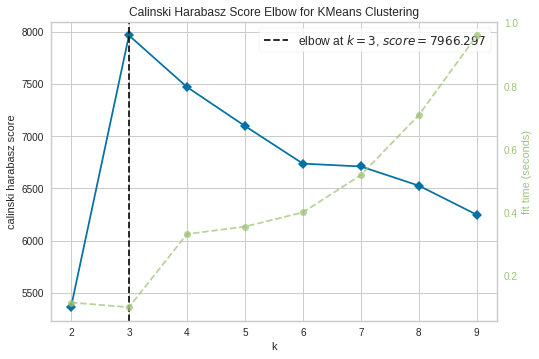

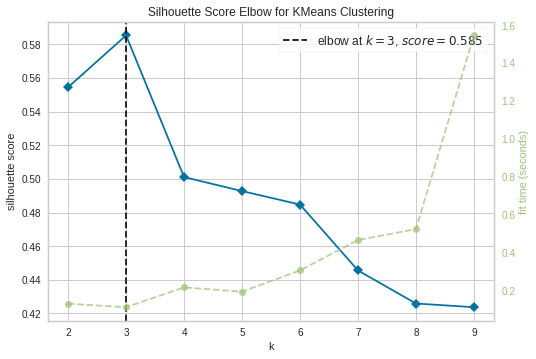

In [ ]:
# Using the elbow method function to understand optimum number of clusters
elbow_method(rfm_scaled)

### Silhouette Analysis

In [ ]:
# Creating a function to calculate silhouette scores
def sil_score(input, k):
  ''' Returns a dataframe with sillhouette scores of different clusters in the data '''

  sil_df = pd.DataFrame(columns = ['Clusters', 'Silhouette Score'])

  for i in range(2,k+1):
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(input)
    score = silhouette_score(input, labels)
    sil_df = sil_df.append({'Clusters' : i,
                            'Silhouette Score' : score}, ignore_index = True)

  return sil_df

In [ ]:
# Using the function to display silhoutte scores at different number of clusters
sil_score(rfm_scaled,10)

,Clusters,Silhouette Score
0,2.0,0.554560
1,3.0,0.585352
2,4.0,0.509349
3,5.0,0.492723
4,6.0,0.484282
5,7.0,0.445032
6,8.0,0.430030
7,9.0,0.422384
8,10.0,0.402815


In [ ]:
# Creating a function for silhouette plot visualization
def sil_visual(input, k):
  ''' Visualize the silhouette plot with different clusters'''

  for i in range(2,k+1):
    kmeans = KMeans(n_clusters = i)
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(input)
    visualizer.poof()

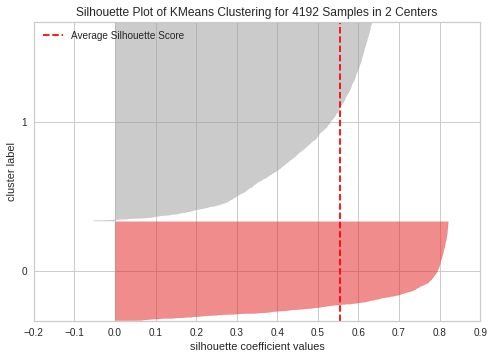

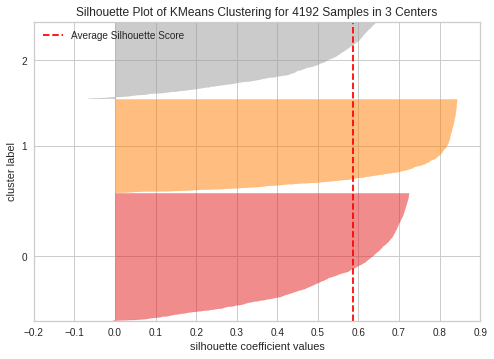

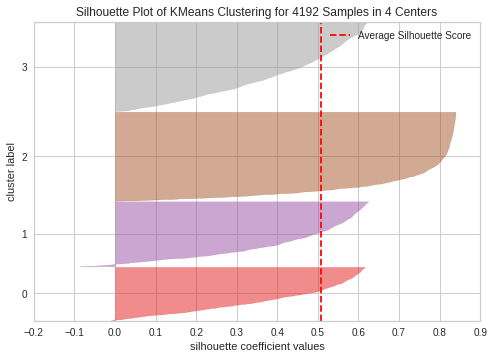

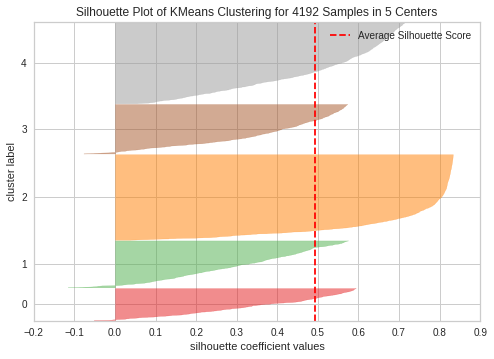

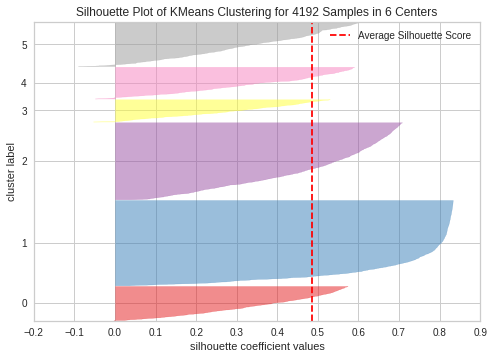

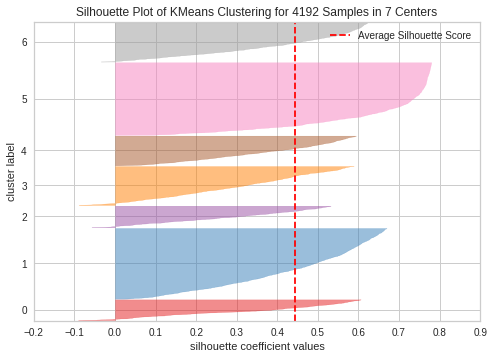

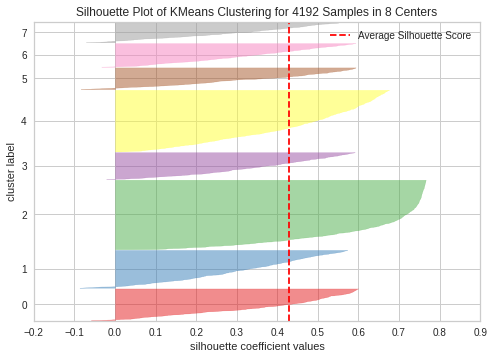

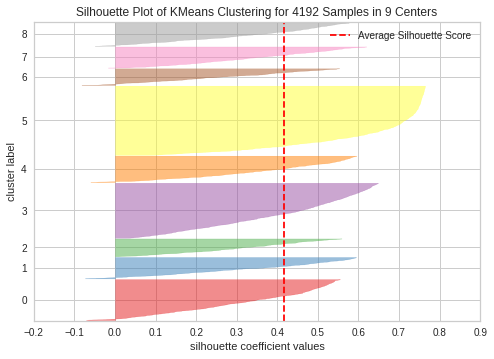

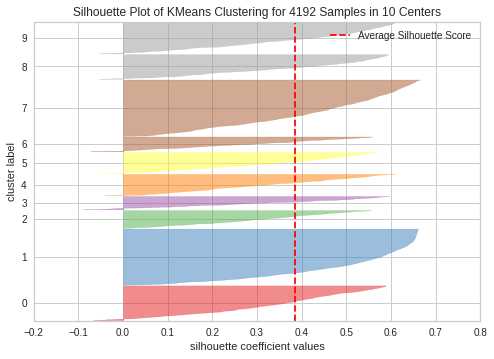

In [ ]:
# Applying the silhouette visualization function for different clusters.
sil_visual(rfm_scaled, 10)

### From the elbow method and silhouette analysis, it is clearly understood that, 3 clusters is performing the best. Hence, 3 clusters will be selected to build the KMeans model and classify the customers.

### Building the KMeans Model

In [ ]:
# KMeans with 3 clusters
kmeans = KMeans(n_clusters = 3, random_state=10)

In [ ]:
# Fitting the model to the data
kmeans.fit(rfm_scaled)

KMeans(n_clusters=3, random_state=10)

### Now predictions of the clusters can be made, these predictions can be represented as a column in the RFM dataframe, which can help in profiling the clusters

In [ ]:
# Creating cluster labels for the data and appending it to the RFM dataframe
labels = kmeans.predict(rfm_scaled)
rfm_df_copy['Cluster'] = labels

In [ ]:
# First 5 rows of the RFM dataframe after adding the cluster column
rfm_df_copy.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347,2,7,3314.73,2
12348,248,3,90.20,0
12349,18,1,999.15,1
12350,310,1,294.40,0
12352,36,7,1130.94,2


## 5. **Cluster Profiling**

In [ ]:
# Grouping by clusters to understand the profiles
rfm_df_copy.groupby('Cluster').mean()

,Recency,Frequency,Monetary
Cluster,,,
0,219.930303,1.675758,353.290455
1,38.098834,2.171016,455.651145
2,24.879552,10.002801,2830.897675


In [ ]:
# Number of customers belonging to each cluster
rfm_df_copy['Cluster'].value_counts()

1    1801
0    1320
2    1071
Name: Cluster, dtype: int64

### By grouping RFM dataframe on the basis of clusters, and using mean to summarize the variables we understand that :-

### 1. Cluster 0 comprises of customers who are very recent, frequent and also contribute largely to the sales.
### 2. Cluster 1 comprises of customers who are moderately recent, frequent and contribute an average amount to sales
### 3. Cluster 2 comprises of customers who made purchaces a long time ago and purchase infrequently and contribute the least towards the sales of the company.

### We can name these clusters as follows :-

### Cluster 0 can be named high value and loyal customers.
### Cluster 1 can be named average value and ordinary customers.
### Cluster 2 can be named low value and casual customers.



### The business has to pay attention to their high value and loyal customers as they bring in the bulk of business. Average value customers can be given more offers in order for them to be more frequent and regular. Casual customers do have an average monetary value but low recency and frequency. They too could be offered more offers in order attract them. They can be offered some services to improve their recency and frequency.


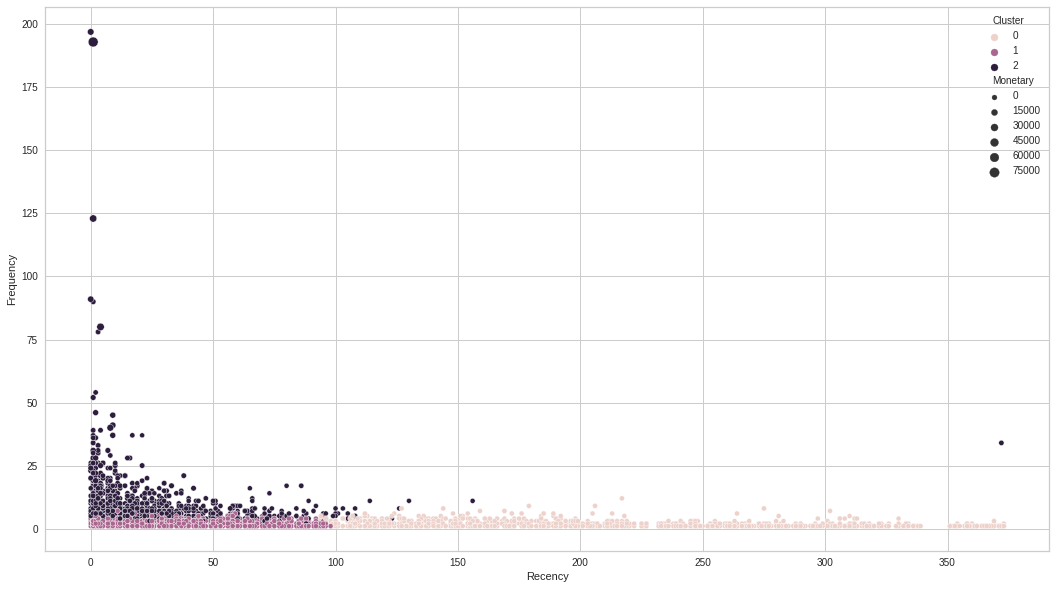

In [ ]:
# Creating a scatter plot to understand the clusters visually
plt.figure(figsize = (18,10))
sns.scatterplot(x = rfm_df_copy['Recency'], y = rfm_df_copy['Frequency'], size= rfm_df_copy['Monetary'], hue = rfm_df_copy['Cluster'])

In [ ]:
# Library import for dendrogram
import scipy.cluster.hierarchy as shc

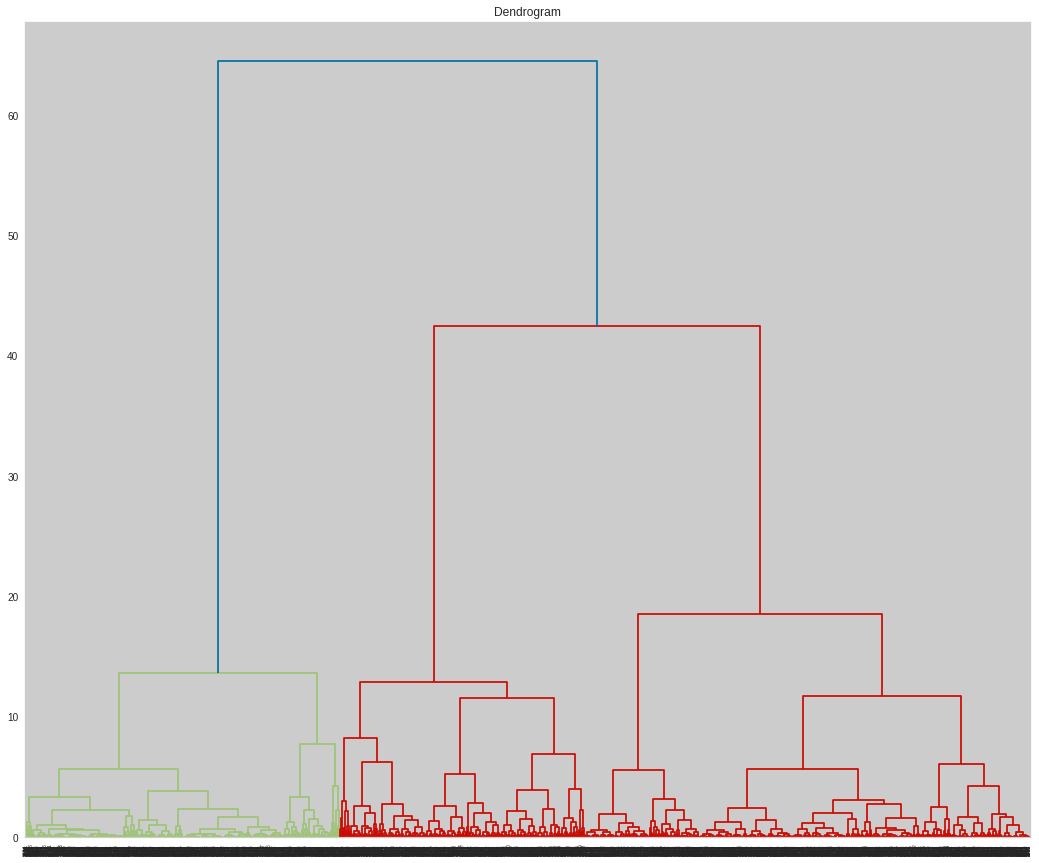

In [ ]:
# Creating a dendrogram to visualize the clusters
plt.figure(figsize = (18,15))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward'))

### From the above dendrogram, it is clearly seen that 3 clusters are the optimum choice even through an hierarchical method.

## **Conclusion**

### In this project, a translational dataset from a UK based online store was used. The data set contained various columns such as item name, quantity, unit price, country from which the order was made, etc. It contains data for almost a period of one year. The main aim of the project was to classify the customers into different segments. These segments will have a defining character of their own. This will help the business cater better to their customers which inturn could increase the profits.

### The project has been done in 5 parts mainly :-

### 1. Data Cleaning - In this section the null values, cancelled orders and outliers were removed.

### 2. Exploratory Data Analysis (EDA) - In this section, univariate and bivariate analysis was conducted to gain deeper understanding of the data. Some insights were found, such as - the last quarter has greater orders of different items, UK has the highest number of orders, the business sell medium to low quantities of single items and the unit price is also lower. 'Pack of 72 retrospot cake cases' were most sold in terms of quantity.

### 3. Data Transformation - In this section, a Recency, Frequency and Monetary analysis was developed for each customer ID. These 3 variables can help segment customers strategically.

### 4. Clustering - In this section, the optimum number of clusters were chosen via elbow method and silhouette analysis. It was found that 3 clusters would be the most optimum. A KMeans model with 3 clusters was developed. Each customer ID was clustered into one of the 3 clusters.

### 5. Cluster Profiling - In this section, the average of recency, frequency and monetary values for each customer segment was identified. On the basis of this, the 3 clusters were named - high value and loyal customers, average value and ordinary customers, low value and casual customers.

### On the basis of this analysis, the business can offer attractive deals to its average and low value customers and they can also treat their high value customers with special business offers such as loyalty points.